# Week 06: In-Class Assignment: <br> Optimizing To Build a Simple Classifier

### <p style="text-align: right;"> &#9989; Kyle Taft
<p style="text-align: right;"> &#9989; Lucas, Jacob

![opt_pic](https://i.ytimg.com/vi/vbcVPA1NWbg/maxresdefault.jpg)

---
## Part 0. Discussion

Read this notebook first and discuss the overall goals with your group. Think about the best ways to assign equal tasks to everyone in your group.

---
## Part 1. Make some fake data

In this IC you are going to build and optimize a classifer using both GD and SGD. So that everything is easily tractable and visualizable, you will build a very simple 2D model; but, the ideas for much, much higher dimensions are all here.

The first thing you need to do is make some fake data. Do this by writing a code to generate random points in the $x_1$-$x_2$ plane and choosing a line in that plane that separates the data. For example, you might choose something like this figure (replace test1 with $x_1$ and test2 with $x_2$):

![fig](https://i.stack.imgur.com/4TbKE.png)

Unlike in this figure, be sure that there is a _true linear separation_ in your data. Make the range of the ${\bf x}$ have values that are not too small - see discussion below.

In your code make the ranges of the variables and the separating line easy to modify. Once you have made your fake data and have chosen your line, label the data $1$ and $0$ depending on whether you are above or below the line. These are the two classes. Make a plot of your data colored coded for class with the separating line to prove that this is operational before continuing. You will also use this plot below to see how the training of the neural network at each step compares with your (secret!) solution.

Some starter code is given here. Or, start with your own.

In [2]:
# import the usual libraries and make the plots look better
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': '9',
          'figure.figsize': (8, 6),
         'axes.labelsize': '18',
         'axes.titlesize':'18',
         'xtick.labelsize':'14',
         'ytick.labelsize':'14'}
plt.rcParams.update(params)

Text(0, 0.5, '$x_2$')

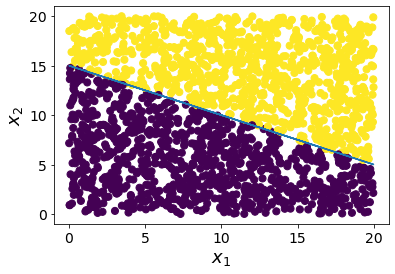

In [3]:
num_points = 2000
x_max = 20
y_max = 20

# make random dataset
rng = np.random.default_rng(42) # use this to control the randomness
x = x_max*np.random.rand(num_points)
y = y_max*np.random.rand(num_points)

# create our secret boundary - shhhh!
w_0 = -3
w_1 = 0.1
w_2 = 0.2
boundary_line = -(w_1*x + w_0)/w_2

# which side? what does this do?
y_labels = (y > boundary_line).astype(float) 

# let's take a peek
plt.scatter(x, y, c=y_labels, marker='o', s = 50)
plt.plot(x, boundary_line)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

&#9989; **Question:** What does `y_labels = (y > boundary_line).astype(float)` do?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

Gives us our y_labels by making the y's above the boundary line 1 and below the boundary line 0. (True = 1, False = 0)
 

---
## Part 2. Define your loss function

Next, you are going to define a loss function for this problem. Using the logistic function

$$\sigma(z) = \frac{1}{1 + e^{-z}},$$

define your loss function as

$$L({\bf w}) = \frac{1}{2M}\sum_{i=1}^M\left(y_i - \sigma({\bf X_i w}) \right)^2.$$

Here, $M$ is the number of data points from above, $y_i$ is the class label of data point $i$, ${\bf X_i}$ is the _i_ th row of our data matrix with features $x_1$ and $x_2$, and ${\bf w}$ is the column vector of weight, _i.e._ the unknowns you seek.

This should look nearly identical to what you did in the pre-class for linear regression and SGD. Here, there are only three differences:

1. you have three parameters, $w_0, w_1, w_2$
2. the hypothesis is no longer a line, but given by $\sigma(z)$
3. this is a classification problem, rather than a regression problem

&#9989; **Task:** Discuss among your group the consequences of these three changes. Do you have features and discrete labels? In a markdown cell, discuss this loss function as compared with linear regression and logistic regression. What are the main differences in this choice versus others?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. We are considering two weights and a intercept weights instead of just a slope and intercept.
2. We are not looking for the slope and intercept of a line, but rather the weights of a sigmoid function.
3. We have discrete labels (y = 0 or 1) and our goal is simply to predict correct catagories.


Let's take a look at the logistic function so that we can get a little more insight into this loss function. Notice its width, which can be controlled using a modified form

$$\frac{1}{1 + e^{-z/z_0}}.$$

Note that the logistic function ranges from $0$ to $1$, just like the labels you created above. You want this sigmoidal function to separate your data.

&#9989; **Task**  With your group work through the partial derivatives of your loss function. Note that there are *three* partial derivatives because there are two input variables and a bias $w_0$. Search for useful relationships that make it easy to compute derivatives of $\sigma$ in terms of $\sigma$ itself.

$$\frac{\partial L}{\partial w_0} = \ldots$$
$$\frac{\partial L}{\partial w_1} = \ldots$$
$$\frac{\partial L}{\partial w_2} = \ldots$$
$$\frac{\partial \sigma(z)}{\partial z} = \ldots$$

In the markdown cell below use $\LaTeX$ to show all of your work. You will use these derivatives to build your GD and SGD code.

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

$$\frac{\partial L}{\partial w_0} = \frac{-1}{M}\sum_{i=1}^M\left((y_i - \sigma({\bf x_{i0} w_0}))*\sigma({\bf x_{i0} w_0})(1-\sigma({\bf x_{i0} w_0})) * x_{i0} \right)$$
$$\frac{\partial L}{\partial w_1} = \frac{-1}{M}\sum_{i=1}^M\left((y_i - \sigma({\bf x_{i1} w_1}))*\sigma({\bf x_{i1} w_1})(1-\sigma({\bf x_{i1} w_1})) * x_{i1} \right)$$
$$\frac{\partial L}{\partial w_2} = \frac{-1}{M}\sum_{i=1}^M\left((y_i - \sigma({\bf x_{i2} w_2}))*\sigma({\bf x_{i2} w_2})(1-\sigma({\bf x_{i2} w_2})) * x_{i2} \right)$$

$$\frac{\partial \sigma(z)}{\partial z} = (1-\sigma(z))\sigma(z) $$


The classifier you are building is a type of neural network. A diagram of the simplest neural network (a perceptron) is given below. Typically there are more layers, which makes the math a little messier, but the idea is the same.  

![perc](https://miro.medium.com/v2/resize:fit:720/format:webp/1*gGmqkjA0VJCe5EhJnoQDNg.png)

## Part 2. Optimization

&#9989; **Task:** Next, we want to minimize the loss function. With the partial derivatives you just obtained, write down the **pseudocode** for a Gradient Descent optimizer and for a Stochastic Gradient Descent optimizer. 

**Note** you have done this already in the pre-class.

<font size=6 color="#009600">&#9998;</font> *Put your pseudocode here!* 

Compute the gradient:
gradient = $\frac{\partial}{\partial w}(L)$

Update the weights:
weights = weights - eta * gradient


&#9989; **Question** How would your pseudocode change if you were to add Tikhonov regularization? How would your derivatives change?

<font size=6 color="#009600">&#9998;</font> *Put your answer here!* 

The pseudocode wouldn't change at all. The only change would be in the derivative of the loss function as seen below:

$$L(w) = 0.5\sum_{n=1}^N (w^Tx_n - y_n )^2 + \lambda \sum_{j=1}^d w_j^2$$

$$\nabla L(w) = \sum_{n=1}^N (w^Tx_n - y_n )x_n + 2\lambda \sum_{j=1}^d w_j$$
 

---
## Part 3. Code it up!

In your Pre-Class assignment you have already coded an Stochastic Gradient Descent optimizer. If you didn't finish it, don't worry sample code is given below.

&#9989; **Task:** Modify the code below to implement your Gradient Descent and Stochastic Gradient Descent optimizers.

In [4]:
def linear_model(X, w):
    return np.dot(X, w)

def logistic_model(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

def compute_gradient(X, y, weights):
    """Compute the gradient of the linear model using the MSE as the loss function"""
    
    # Check the slides to understand the code below
    gradient = -1/len(X)  * np.dot(X.T, (y - log(X, weights)))
    
    return gradient

def sgd_optimizer(X, y, learning_rate=0.01, epochs=1000, batch_size=10):
    # Initialize the weights from a normal distribution
    weights = np.random.randn(X.shape[1])
        
    for epoch in range(epochs):
        
        # Randomly select batch_size indices
        indices = np.random.choice(len(X), batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Compute the gradient
        gradient = compute_gradient(X_batch, y_batch, weights)
        
        # Update the weights
        weights -= learning_rate * gradient
    return weights


def gd_optimizer(X, y, learning_rate=0.01, epochs=1000):
    # Initialize the weights from a normal distribution
    weights = np.random.randn(X.shape[1])
        
    for epoch in range(epochs):
        # Compute the gradient
        gradient = compute_gradient(X, y, weights)
        # Update the weights
        weights -= learning_rate * gradient
    return weights



In [ ]:
#  Put your code here

## Part 4. Perform the Classification

&#9989; **Task:** Run your code with the fake data you created above and play with the weights to get your classifier "close", and then use those as your starting weights.

You might recall that we did this when we used `curve_fit`: it is often necessary to play with things in advance to get close enough that the optimizer has a chance of finding the global minimum. 

**Note:** The following might require modifying your functions.

* Visualize what is happening by plotting the current line on the data as the GD is occuring, using the plot you already built above.
* And, make a plot of the loss function versus iteration with both GD and SGD.
* For the case of GD how many times do you need to use the full batch of data?
* For the case of SGD, how many times do you need to sequence through the data?
* How do you choose your learning rate? Vary the learning rate to explore its impact.

If your plot of loss versus iteration looks too crazy, start with initial ${\bf w}$ that are close (but not exactly!) to what you used to make the fake data and make the training rate smaller.

In [ ]:
# Put your code here

---

## Part 5. Regularization of the Neural Network


&#9989; **Task:** Add Tikhonov regularization to the loss function, rederive the GD/SGD update equations and rerun your code. Discuss the outcome.

In [ ]:
# Put your code here

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.